# Prep Notebook 6
## Forecasting The Bachelorette and Pumpkin Spice I

This optional notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 6` notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

#### 1. `.loc`, `.iloc`, `.copy()` and `.drop`

Load the data stored in `GOOG.csv` in the `data` folder into a variable called `google`.

- Use `parse_dates` when loading the data or `to_datetime` to make the `Date` a `datetime`,
- Look at the last five observations,
- Store the last 10 observations in a new variable, call it `goog_test`,
- Using `.drop` store every other observation in a new variable called `goog_train`.

##### Sample Solution

In [2]:
google = pd.read_csv("../../data/GOOG.csv",
                        parse_dates=['Date'])

In [3]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4427,2022-03-21,2736.949951,2751.649902,2692.229980,2729.570068,2729.570068,1331600
4428,2022-03-22,2730.000000,2830.000000,2730.000000,2805.550049,2805.550049,1488800
4429,2022-03-23,2782.770020,2800.500000,2763.330078,2770.070068,2770.070068,1265100
4430,2022-03-24,2785.449951,2827.929932,2760.788086,2826.239990,2826.239990,1027200
4431,2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500


In [4]:
goog_test = google.iloc[-10:].copy()
goog_train = google.drop(goog_test.index).copy()

#### 2. More plots

Using the training set plot the first 150 observations of the:
- `Close` column as a solid black line and
- `High` and `Low` columns as dotted black lines.

##### Sample Solution

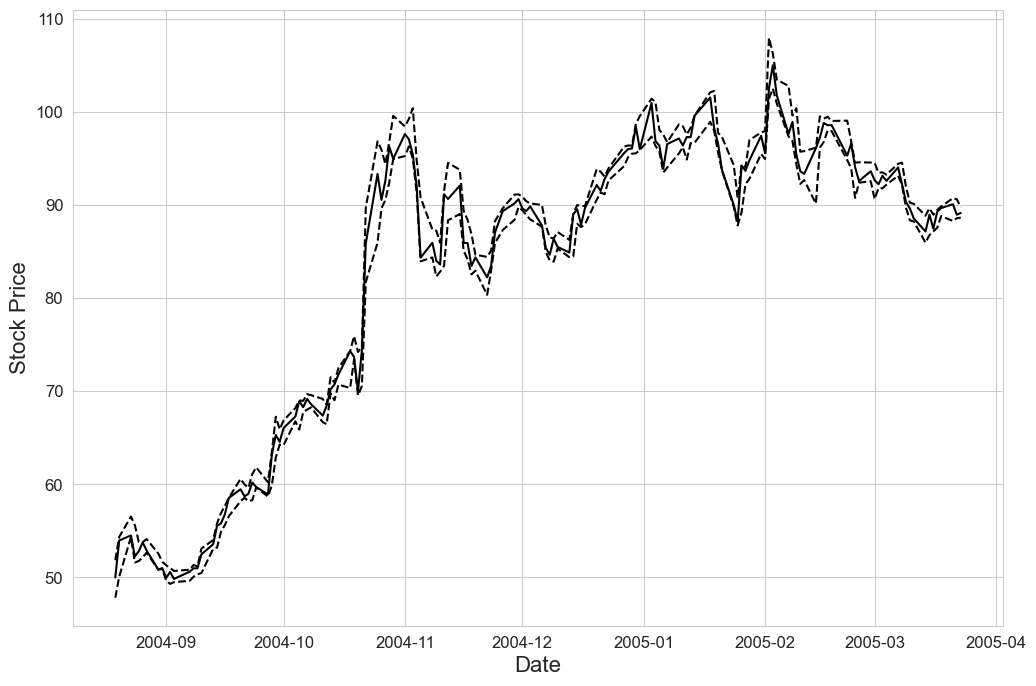

In [5]:
plt.figure(figsize=(12,8))

plt.plot(goog_train.Date.values[:150],
            goog_train.Close.values[:150],
            'k-')
plt.plot(goog_train.Date.values[:150],
            goog_train.Low.values[:150],
            'k--')
plt.plot(goog_train.Date.values[:150],
            goog_train.High.values[:150],
            'k--')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Stock Price", fontsize=16)

plt.show()

#### 3. `.mean()`

Using `pandas` find the average value of `Volume` for the training set.

##### Sample Solution

In [6]:
goog_train.Volume.mean()

6401267.987562189

#### 4. `.corr()` for lag

The value of a time series at <i>lag</i> $k$ is the value you observe $k$ days after the current day. It is sometimes useful to look at the correlation between a time series and the lagged time series.

Using `pandas` `.corr`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</a>, find the correlation between the closing price and the closing price at a lag of 10.

##### Sample Solution

In [7]:
goog_train['lag_10'] = np.nan


goog_train.iloc[:-10, -1] = goog_train.Close[10:]

In [8]:
goog_train[['Close', 'lag_10']].corr()

,Close,lag_10
Close,1.000000,0.997686
lag_10,0.997686,1.000000


#### 5. A trend model

Use `LinearRegression` to fit a model regressing the close against the trading day using the training set. Note you will want your trading days to start counting at 1. Plot the fitted model over the training data.

##### Sample Solution

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

reg.fit(np.arange(1, len(goog_train) + 1).reshape(-1,1),
           goog_train.Close)

LinearRegression()

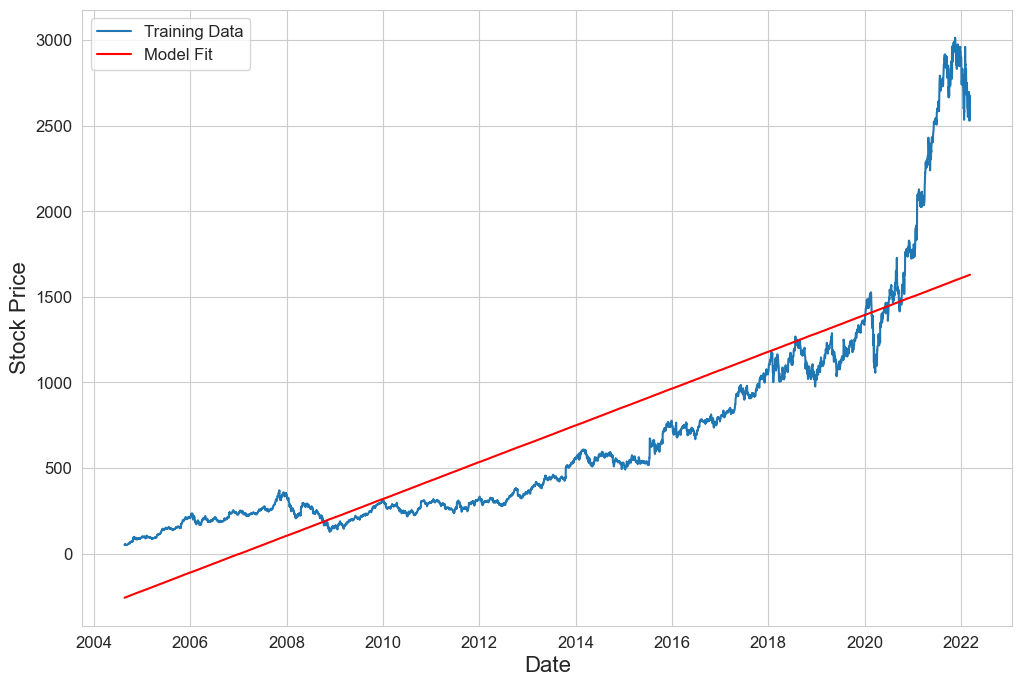

In [11]:
plt.figure(figsize=(12,8))

plt.plot(goog_train.Date,
            goog_train.Close,
            label="Training Data")

plt.plot(goog_train.Date,
            reg.predict(np.arange(1, len(goog_train) + 1).reshape(-1,1)),
            "r",
            label="Model Fit")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Stock Price", fontsize=16)

plt.show()

#### 6. MSE

Find the training mean squared error of the model you just fit.

##### Sample Solution

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(goog_train.Close,
                      reg.predict(np.arange(1, len(goog_train) + 1).reshape(-1,1)))

117031.7209054958

#### 7. `.apply`

Below is a function called `get_year` that will extract the year from a `datetime`.

Using `.apply`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html</a>, get the year for all of the dates in the training set.

In [14]:
def get_year(date):
    return date.year

##### Sample Solution

In [15]:
goog_train.Date.apply(get_year)

0       2004
1       2004
2       2004
3       2004
4       2004
        ... 
4417    2022
4418    2022
4419    2022
4420    2022
4421    2022
Name: Date, Length: 4422, dtype: int64

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)